/Users/karan/Developer/ChaiBachai

0: 640x384 1 rim, 313.6ms
Speed: 1.9ms preprocess, 313.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


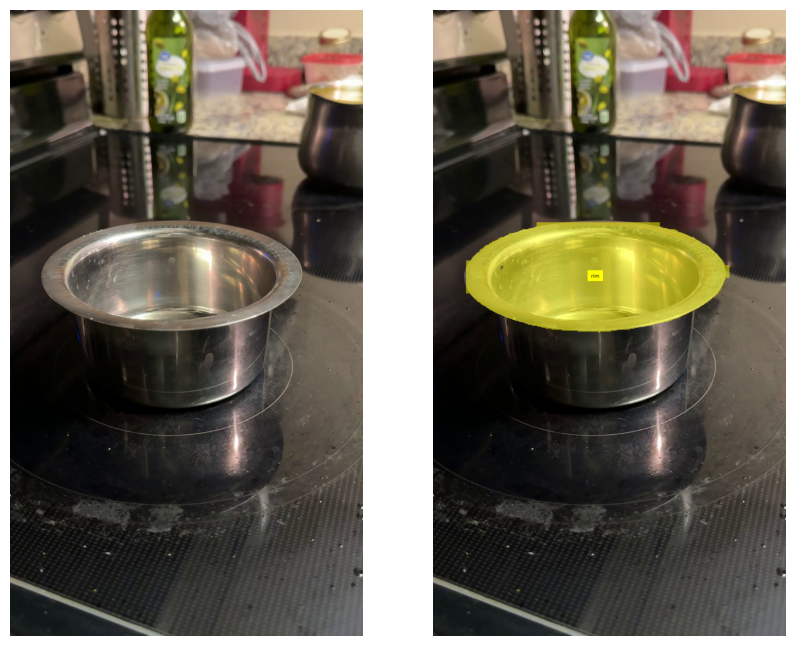


0: 640x384 1 rim, 316.7ms
Speed: 2.0ms preprocess, 316.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


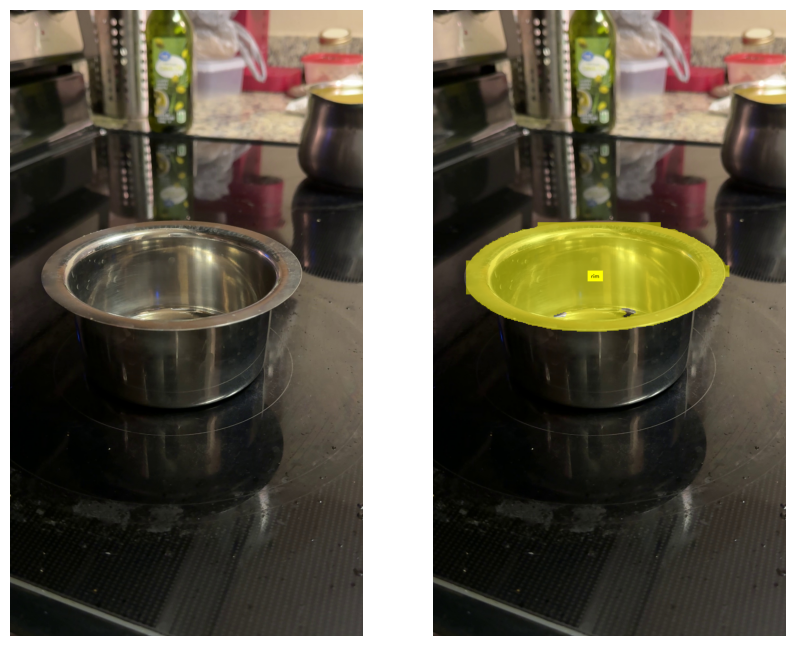


0: 640x384 1 rim, 320.4ms
Speed: 1.3ms preprocess, 320.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)


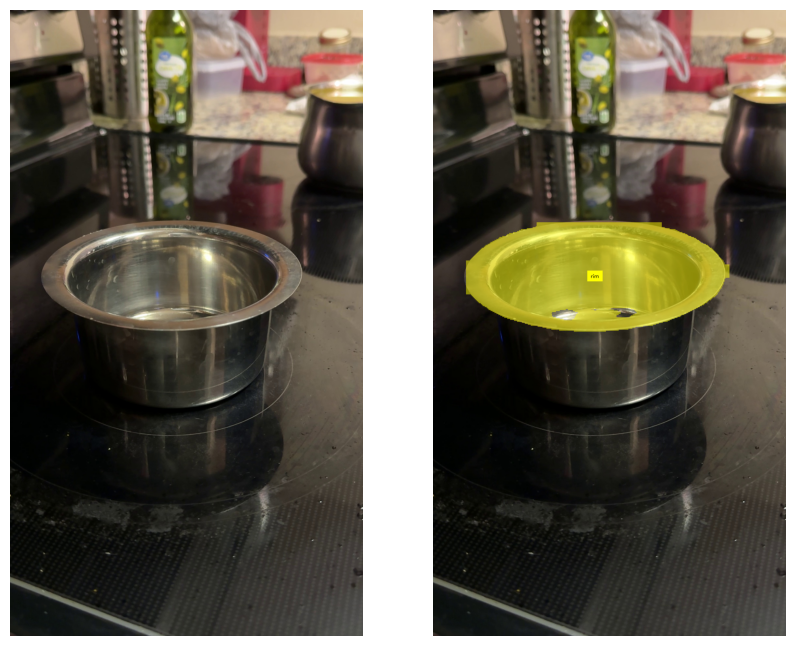


0: 640x384 1 rim, 383.0ms
Speed: 1.8ms preprocess, 383.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


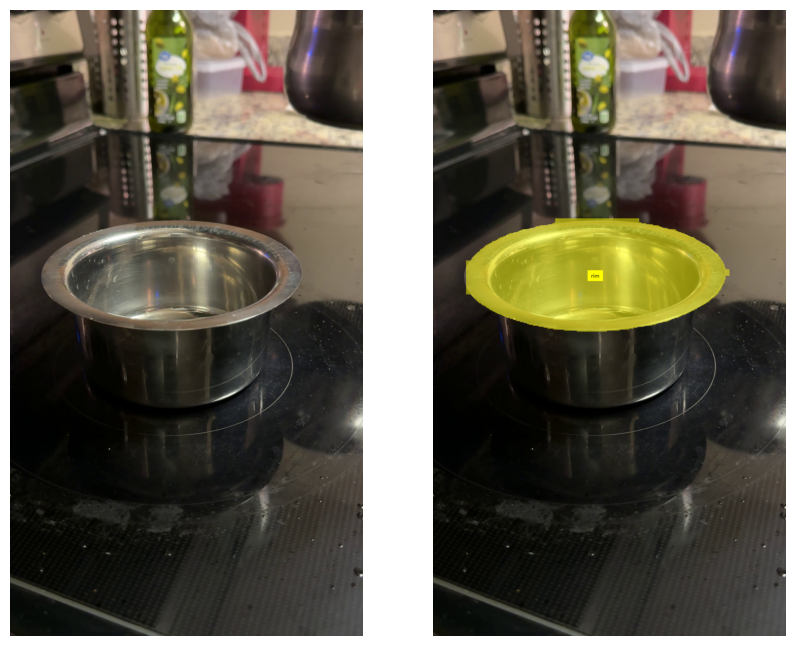


0: 640x384 1 rim, 1 tea, 317.2ms
Speed: 1.4ms preprocess, 317.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)


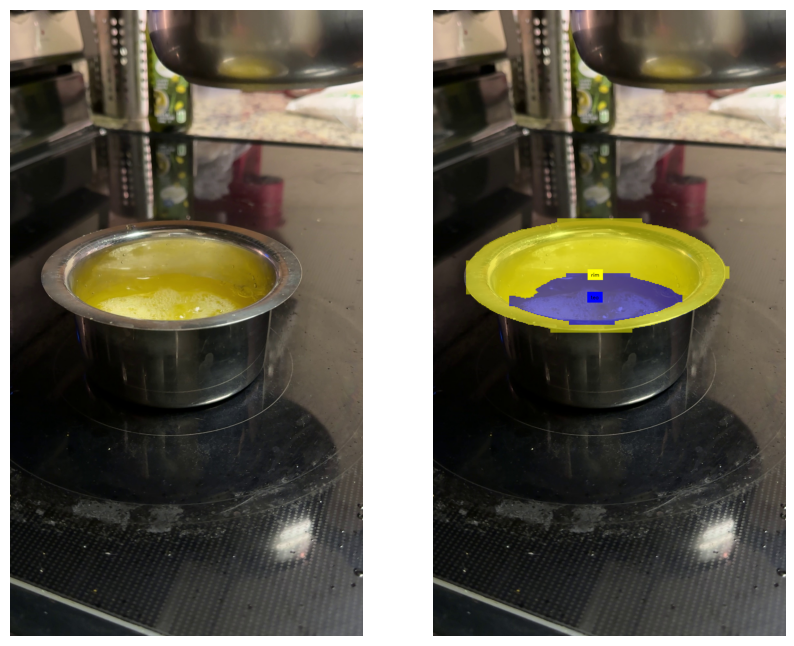


0: 640x384 1 rim, 1 tea, 330.4ms
Speed: 1.6ms preprocess, 330.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 384)


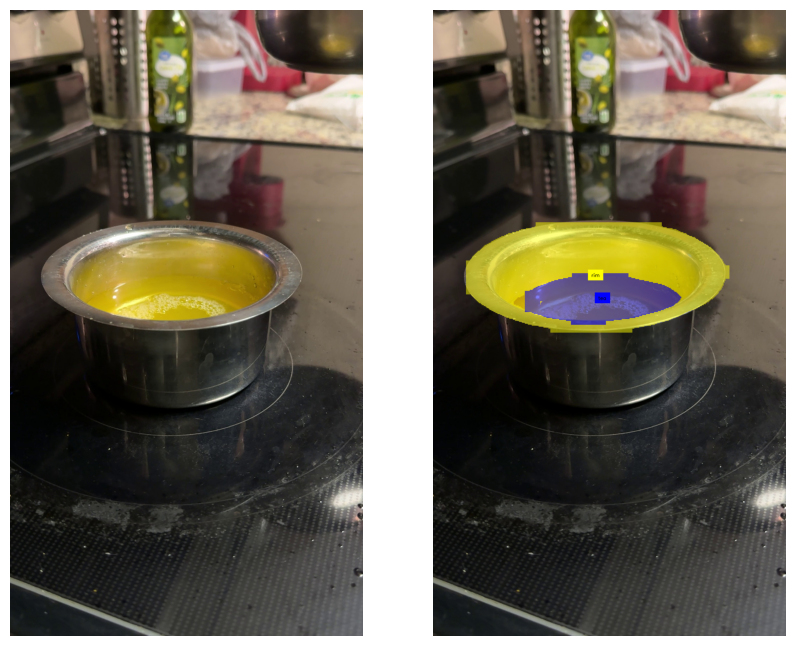


0: 640x384 1 rim, 1 tea, 326.4ms
Speed: 1.6ms preprocess, 326.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


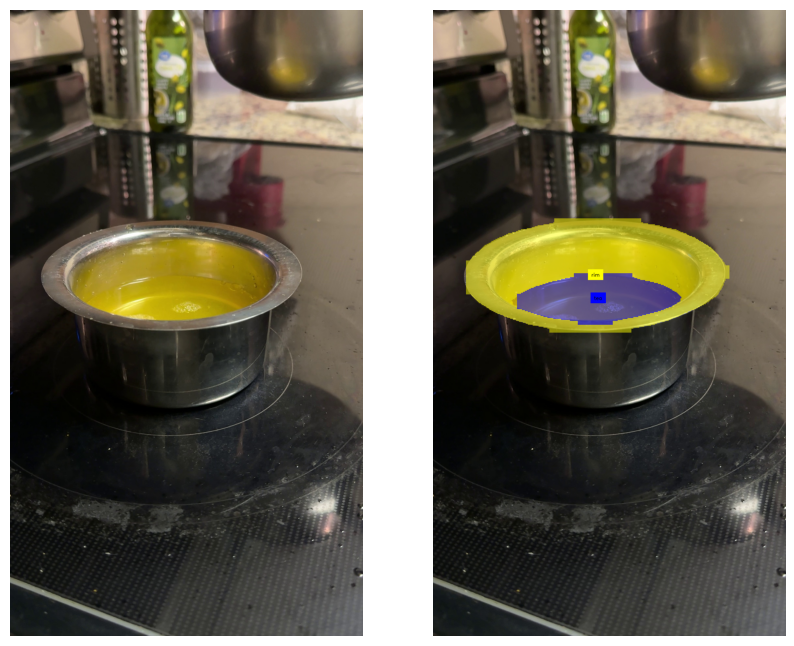


0: 640x384 1 rim, 1 tea, 316.3ms
Speed: 1.6ms preprocess, 316.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)


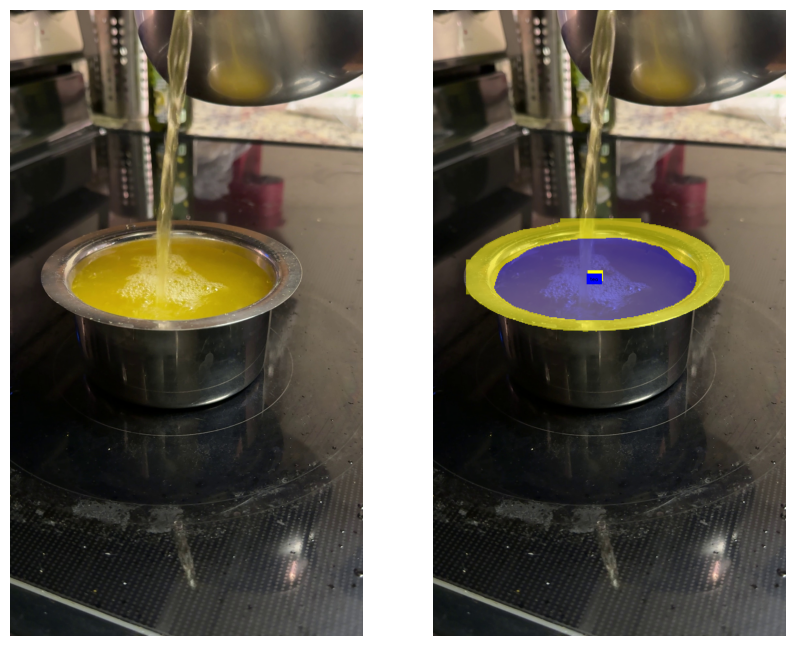


0: 640x384 1 rim, 1 tea, 319.0ms
Speed: 1.5ms preprocess, 319.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 384)


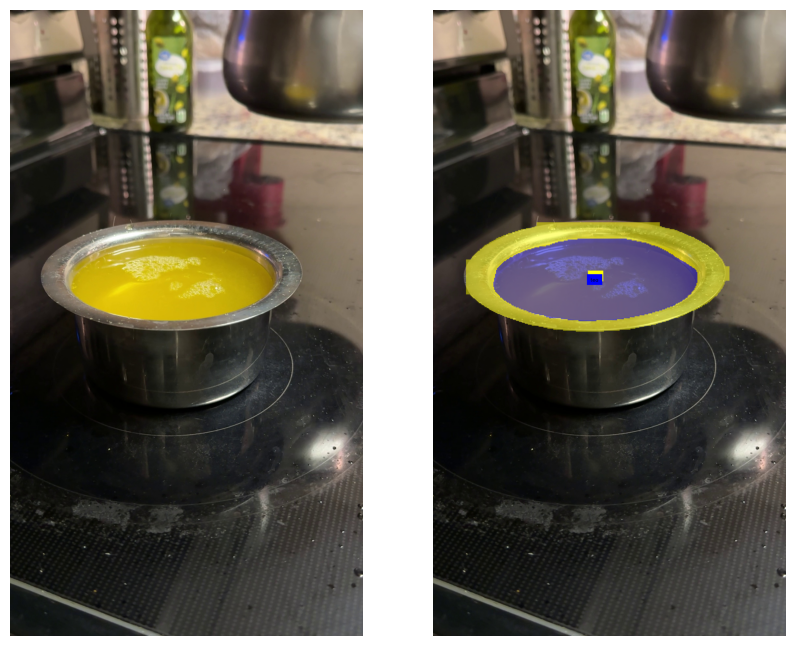


0: 640x384 1 rim, 1 tea, 325.0ms
Speed: 1.7ms preprocess, 325.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)


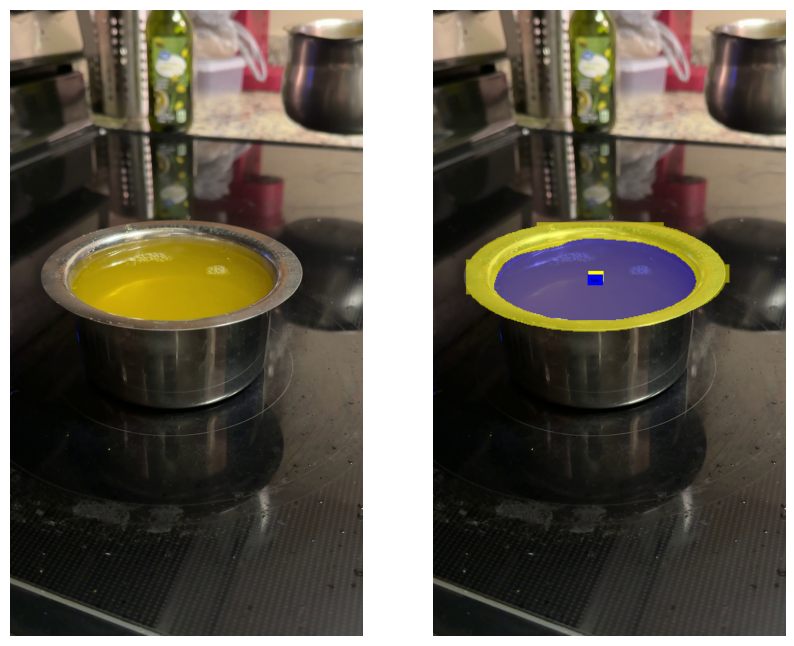


0: 640x384 1 rim, 1 tea, 330.8ms
Speed: 1.8ms preprocess, 330.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


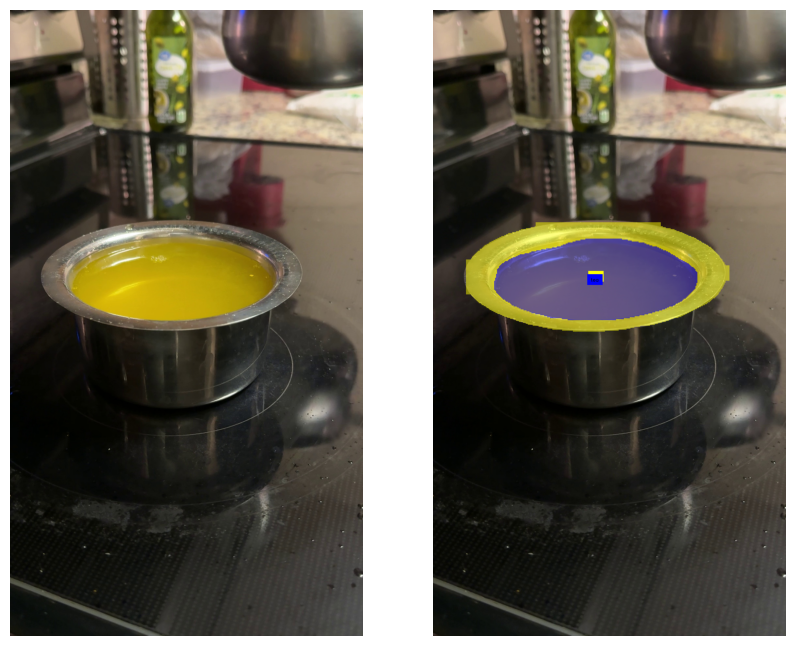


0: 640x384 1 rim, 1 tea, 322.6ms
Speed: 13.7ms preprocess, 322.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)


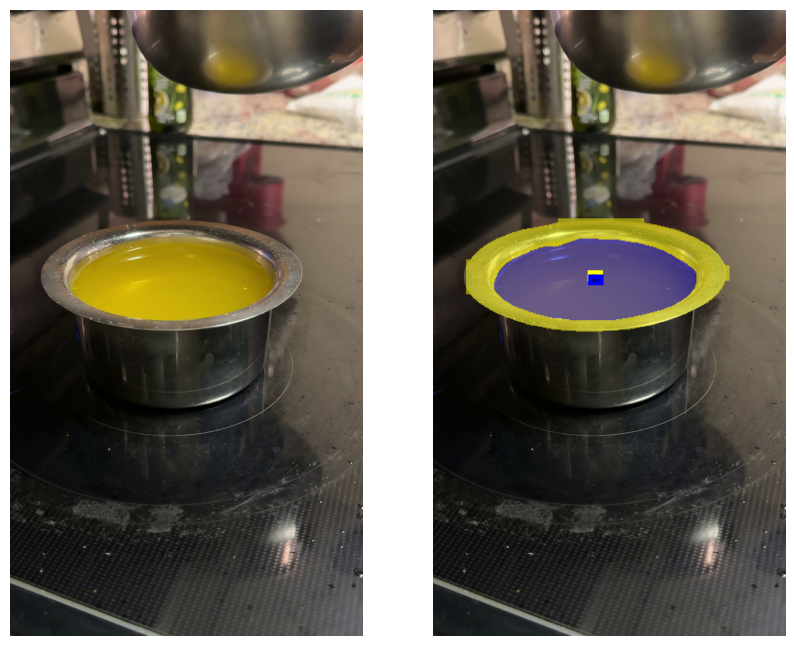


0: 640x384 1 rim, 1 tea, 395.9ms
Speed: 2.1ms preprocess, 395.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 384)


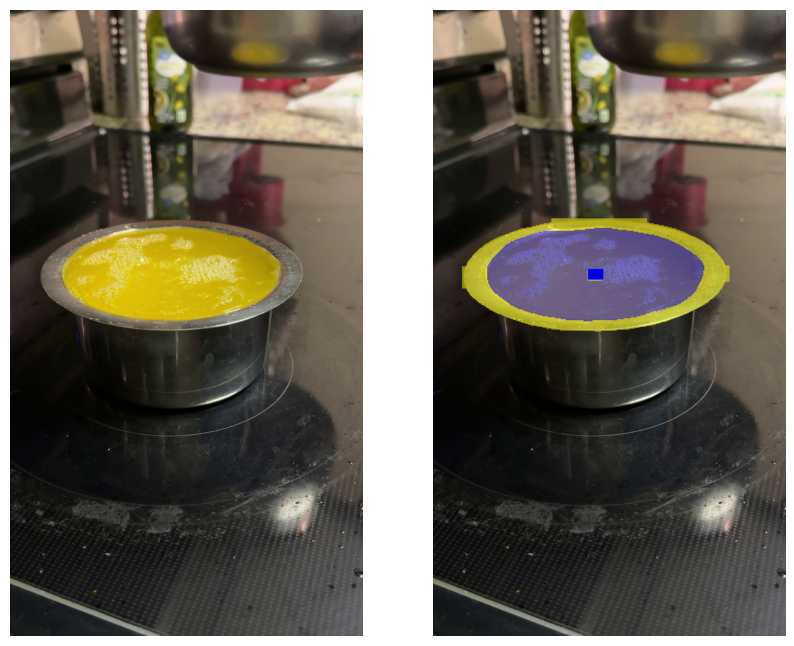


0: 640x384 1 rim, 1 tea, 433.2ms
Speed: 2.3ms preprocess, 433.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 384)


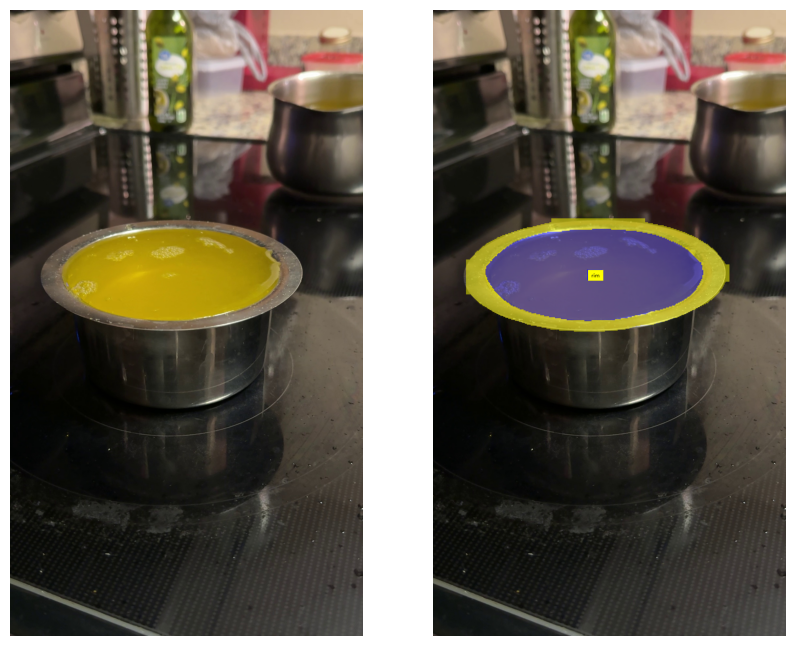


0: 640x384 1 rim, 1 tea, 325.0ms
Speed: 2.1ms preprocess, 325.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)


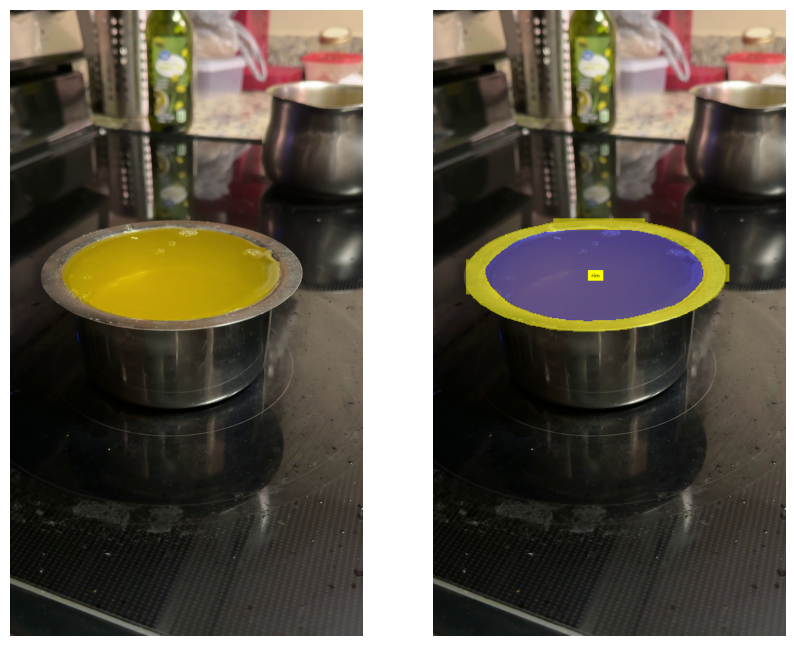

In [20]:
from ultralytics import YOLO
from PIL import Image
import os
import supervision as sv
import glob

HOME = os.getcwd()
print(HOME)

model = YOLO(f"{HOME}/Epoch-500-best-yolo11-segmentation.pt")

colors = sv.ColorPalette.from_hex(
    ["#808080", "#ffff00", "#0000ff"]
)  # gray, yellow, blue
mask_annotator = sv.MaskAnnotator(color=colors)
label_annotator = sv.LabelAnnotator(
    text_color=sv.Color.BLACK, text_position=sv.Position.CENTER, color=colors
)

annotated_images = []
n = 0

for image in sorted(glob.glob(f"{HOME}/SAM-TRAIN-IMAGES/frames-small-pan/*.jpg")):
    image = Image.open(image)
    result = model.predict(image, conf=0.75)[0]
    detections = sv.Detections.from_ultralytics(result)
    annotated_image = image.copy()
    mask_annotator.annotate(annotated_image, detections=detections)
    label_annotator.annotate(annotated_image, detections=detections)
    # sv.plot_image(image, size=(10, 10))
    # sv.plot_image(annotated_image, size=(10, 10))
    sv.plot_images_grid([image,annotated_image], grid_size=(1, 2), size=(10, 10))
    # annotated_images.extend([annotated_image])
    # n += 1

# sv.plot_images_grid(annotated_images, grid_size=(int(n / 2), 2), size=(20, 20))
